This project is to identify the attributes/characteristics that have high tendency of carring out fraudulent credit card transactions based on the dataset collected.

The hypothesis is that some of the demographic factors play an important clues to classify card users into differnt risk level of credit card default groupings.

Dataset Information:
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005
The target column is the 'default.payment.next.month'

There are 25 variables:
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import json
from math import log
from sklearn.datasets import load_boston

%matplotlib inline

In [548]:
Credit= pd.read_csv('/Users/kaiengwee/Documents/GitHub/GA18Aug/Project4/UCI_Credit_Card.csv')
Credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [549]:
Credit.rename(columns={'default.payment.next.month':'default_nextMTH'},inplace= True)

In [550]:
Credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [551]:
Credit['default_nextMTH'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_nextMTH, dtype: float64

In [552]:
Credit.shape

(30000, 25)

In [553]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null float64
BILL_AMT2          30000 non-null float64
BILL_AMT3          30000 non-null float64
BILL_AMT4          30000 non-null float64
BILL_AMT5          30000 non-null float64
BILL_AMT6          30000 non-null float64
PAY_AMT1           30000 non-null float64
PAY_AMT2           30000 non-null float64
PAY_AMT3           30000 non-null float64
PAY_AMT4           30000 non-nu

In [554]:
Credit.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [555]:
Credit.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [556]:
Credit.nunique()

ID                 30000
LIMIT_BAL             81
SEX                    2
EDUCATION              7
MARRIAGE               4
AGE                   56
PAY_0                 11
PAY_2                 11
PAY_3                 11
PAY_4                 11
PAY_5                 10
PAY_6                 10
BILL_AMT1          22723
BILL_AMT2          22346
BILL_AMT3          22026
BILL_AMT4          21548
BILL_AMT5          21010
BILL_AMT6          20604
PAY_AMT1            7943
PAY_AMT2            7899
PAY_AMT3            7518
PAY_AMT4            6937
PAY_AMT5            6897
PAY_AMT6            6939
default_nextMTH        2
dtype: int64

No default in next month: 23364
Default in next month: 6636
Proportion: 3.52 : 1


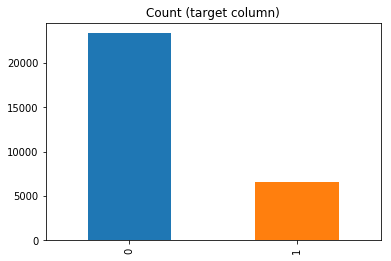

In [557]:

target_count = Credit['default_nextMTH'].value_counts()
print('No default in next month:', target_count[0])
print('Default in next month:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target column)');


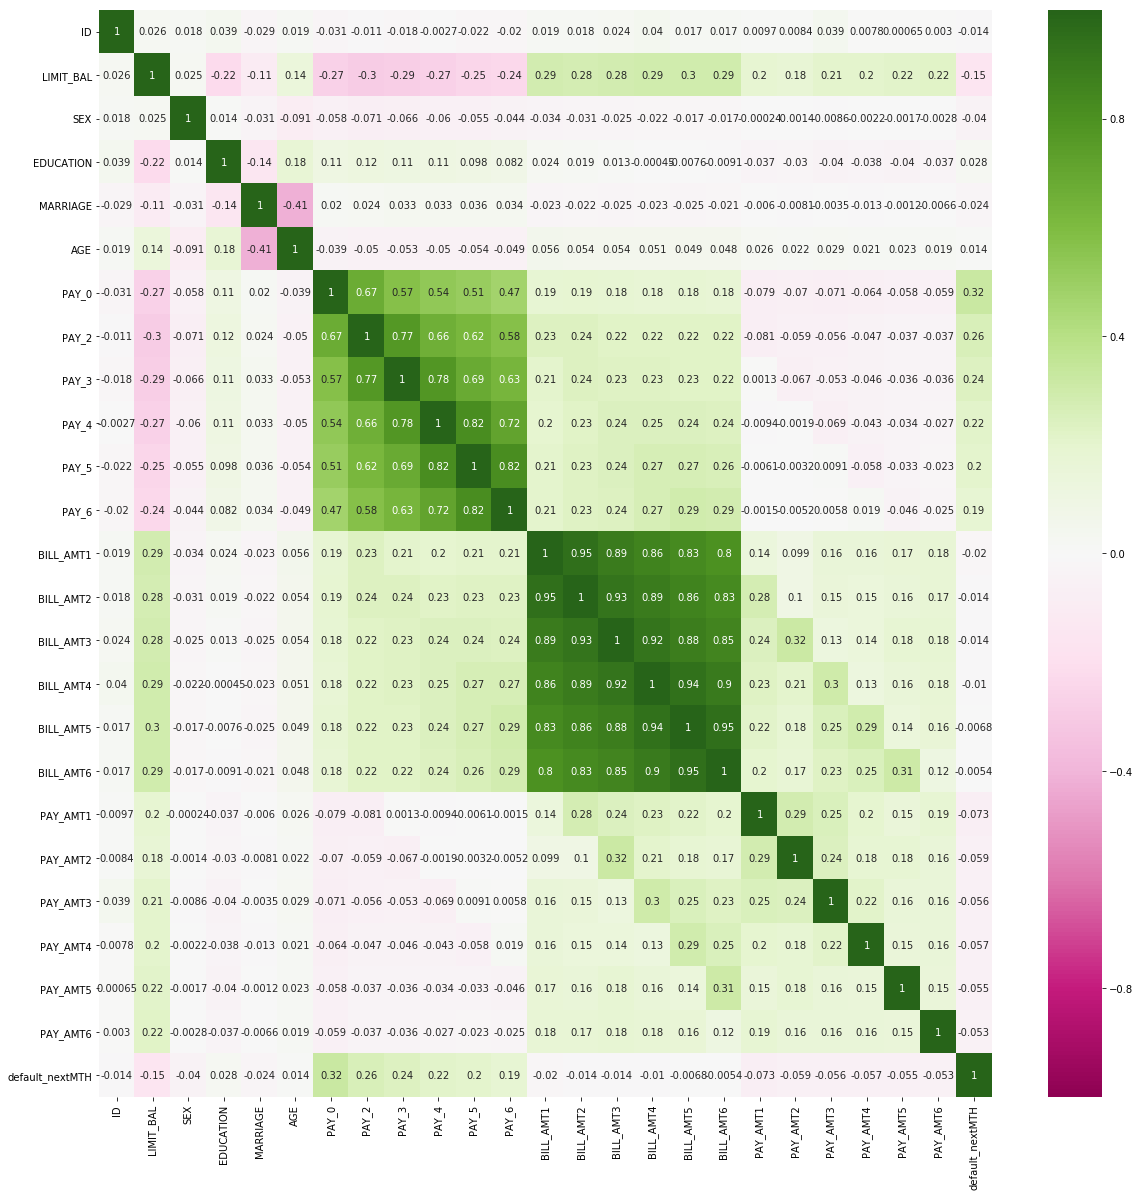

In [558]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

From the heatmap above, BILL_AMT1 to BILL_AMT6 are highly correlated within themselves. Since BILL_AMT1 is the 
latest billing month before default occured, I will drop out BILL_AMT2 to BILL_AMT6. In addition, ID feature will 
also be removed since it doesn't mean anything in predicting the default occurence.

In [559]:
Credit.drop(['ID','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis = 1, inplace = True)

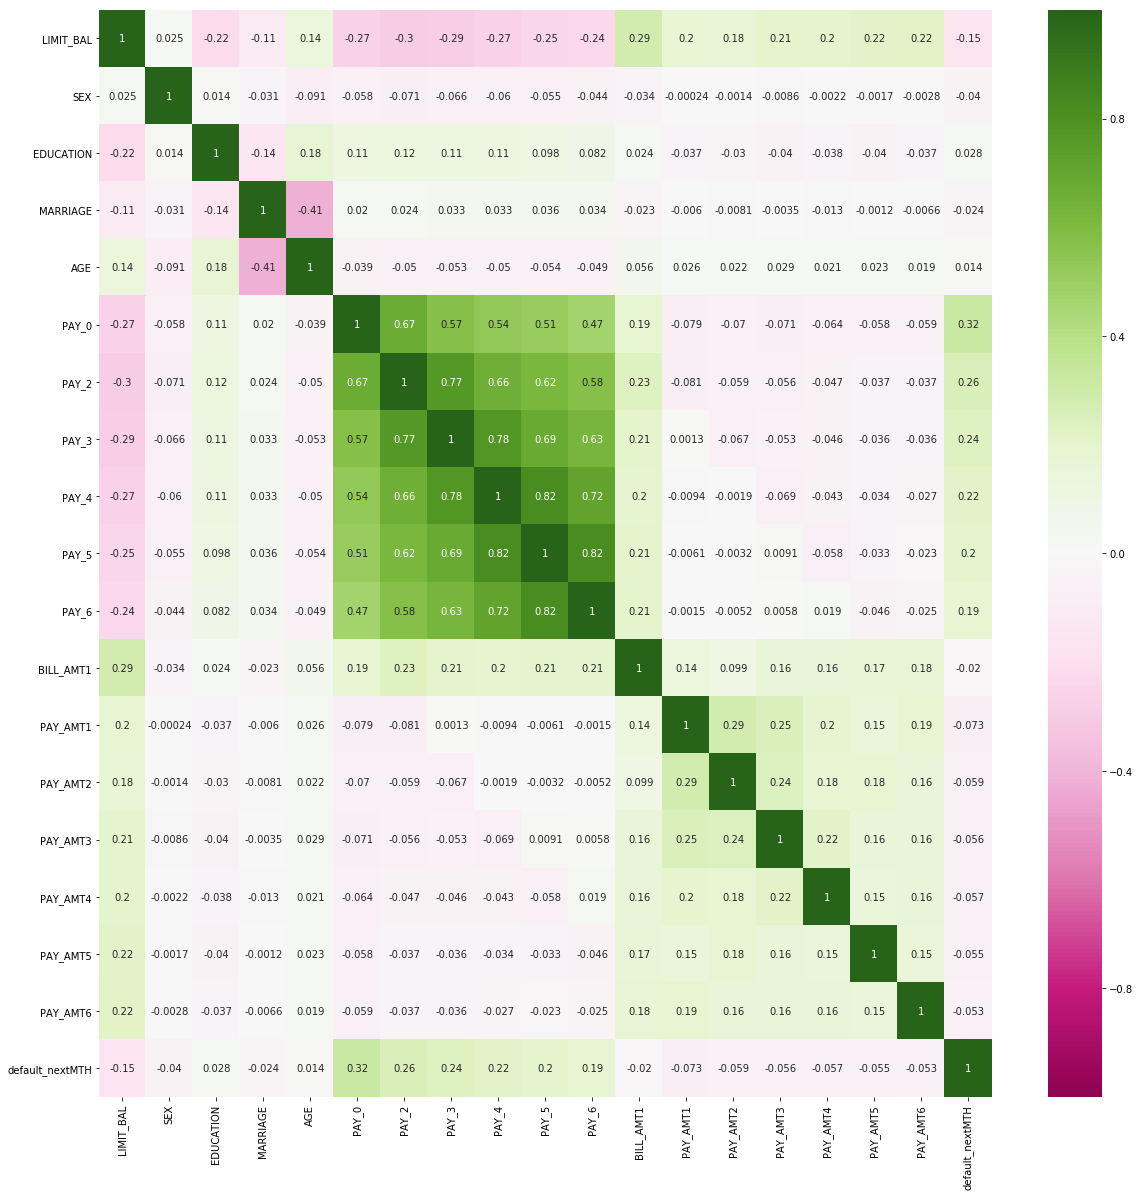

In [560]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

In [561]:
#sns.pairplot(Credit, size=4)

In [562]:
count_d = 0
count_nd = 0

for i in Credit['default_nextMTH']:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 30000
Total default cases 6636 or  22.0 %
Total non-default cases 23364 or  78.0 %


In [563]:
Credit.shape

(30000, 19)

In [564]:
Credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [565]:
Credit.isnull().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [ ]:
Credit_dummies

In [566]:
# Create feature matrix (X)
feature_cols = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
X= Credit[feature_cols]

# Create response vector (y)
#target_col= pd.Credit['default.payment.next.month']
y= Credit['default_nextMTH']

In [567]:
print((type(X)))
print((type(X.values)))
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [568]:
print((X.shape))
print((y.shape))

(30000, 18)
(30000,)


In [569]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

In [570]:
from sklearn.linear_model import LogisticRegression
linreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print('Testing score: '  + str(linreg.score(X_test, y_test)))
print('Training score: '  + str(linreg.score(X_train, y_train)))

Testing score: 0.7830666666666667
Training score: 0.7773777777777777


In [571]:
print(linreg.intercept_)
print(linreg.coef_)

[-0.00055741]
[[-3.19155509e-06 -1.02208468e-03 -1.18500221e-03 -1.08370765e-03
  -1.50205293e-02  1.85365719e-03  1.50755413e-03  1.39791868e-03
   1.31294001e-03  1.28667433e-03  1.25868304e-03  1.99285651e-06
  -1.94160582e-05 -1.81075176e-05 -1.02980309e-05 -7.36163075e-06
  -3.55576014e-06 -4.20691083e-06]]


In [572]:
coeff = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=[0])
coeff

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.000003,-0.001022,-0.001185,-0.001084,-0.015021,0.001854,0.001508,0.001398,0.001313,0.001287,0.001259,0.000002,-0.000019,-0.000018,-0.00001,-0.000007,-0.000004,-0.000004


In [573]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.default_nextMTH
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [574]:
print(train_test_rmse(Credit,['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4']))

0.3863133221364505


In [575]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

array([0.21693333, 0.21693333, 0.21693333, ..., 0.21693333, 0.21693333,
       0.21693333])

In [576]:
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.4121568417753395

Automatically created module for IPython interactive environment


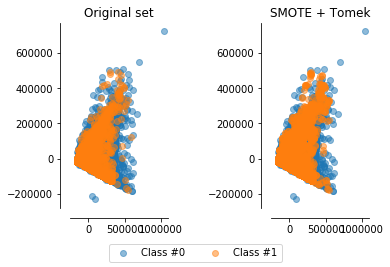

In [579]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek

print(__doc__)

X= Credit[feature_cols]
y= Credit.default_nextMTH

# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.22, 0.78],
                           #n_informative=3, n_redundant=1, flip_y=0,
                           #n_features=18, n_clusters_per_class=1,
                           #n_samples=30000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=18)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply SMOTE + Tomek links
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + Tomek')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([-6, 8])
    #ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()


In [588]:
Credit_ST= pd.DataFrame([X_resampled, y_resampled])
print(X_resampled)
#print(y_resampled)
Credit_ST.head()

[[2.00000000e+04 2.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.20000000e+05 2.00000000e+00 2.00000000e+00 ... 1.00000000e+03
  0.00000000e+00 2.00000000e+03]
 [9.00000000e+04 2.00000000e+00 2.00000000e+00 ... 1.00000000e+03
  1.00000000e+03 5.00000000e+03]
 ...
 [3.00000000e+04 2.00000000e+00 1.61535537e+00 ... 7.50463893e+02
  1.06153554e+03 7.67087992e+02]
 [1.00000000e+04 2.00000000e+00 2.14190967e+00 ... 2.57427100e+02
  1.14190967e+03 4.29045167e+02]
 [5.00000000e+04 1.00000000e+00 2.43717767e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


,0
0,"[[20000.0, 2.0, 2.0, 1.0, 24.0, 2.0, 2.0, -1.0..."
1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."


In [587]:
from sklearn.linear_model import LogisticRegression
linreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=123)

model = linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print('Testing score: '  + str(linreg.score(X_test, y_test)))
print('Training score: '  + str(linreg.score(X_train, y_train)))

Testing score: 0.6558787018974995
Training score: 0.6485871364388744


0.3863133221364505


In [ ]:
Sex= pd.get_dummies(Credit.SEX)
Sex.head()

In [ ]:
Credit= pd.concat([Credit,dummy], axis=1)
Credit.head()

In [ ]:
Credit['default.payment.next.month'].value_counts()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = Credit.columns[2:]

X = Credit[labels]
y = Credit['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))